## Summary:
* The first half of the notebook is to answer the excel questions, the second part is exploratory data analysis of the loan data. 
* EDA primarily explored some key attributes of the loans and borrowers, such as dti, loan purpose, loan grade, bankcard/revolving utilization, loan grade and their relations with default rate, interest rate and annual income. It's apparent that the higher the default risk, the higher the interest rate and ROI. Investors of the LC can use those information about the key attributes to evaluate the portfolio before purchasing according to their tolerance of risk and expectation of ROI. 

#### Some interesting finding from the EDA:
1. dti >40 has a lower default rate and interest rate than dti within the 30-40 bucket. it's not what's normally expected. The reason of this might be LC is cautious when issuing loans to high dti borrowers, but if they do, the prcess is more selective and the chance of getting the moeny back is somehow higher than expected. 
2. The same situation with the loan grade and annual income relation - the lowest income borrowers are in grade D. grade E, F and G however, have a upward trend of average income.
3. Grade G loans have lower default rate than grade F in most of loan purpose categories. Grade G default rate is particuly high in the "medical" category, while significantly lower in "moving". Grade B loans shows unusually high default rate in "wedding". 
4. High income people are charged with lower interest rate in general, but they seem to pay high when their loan purpose is "wedding". Celebrative occasions seem to be a good reason to charge people high rate, especially when borrowers are reported to have high income and have a generally better chance to pay back- something to think about for the investors when they choose loan porfolios.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
loan_data= pd.read_csv('lc_data_tape.csv')
payment = pd.read_csv('lc_payment_file.csv')

/Users/lalago31/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1069697,NaN,15000.0,15000.0,15000.0,36 months,9.91%,483.38,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1069657,NaN,5000.0,5000.0,5000.0,60 months,16.77%,123.65,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1069530,NaN,7000.0,7000.0,7000.0,36 months,15.96%,245.97,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1069314,NaN,3000.0,3000.0,3000.0,36 months,18.25%,108.84,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1069469,NaN,6000.0,6000.0,6000.0,36 months,6.03%,182.62,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [7]:
payment.head()

,LOAN_ID,PBAL_BEG_PERIOD,PRNCP_PAID,INT_PAID,FEE_PAID,DUE_AMT,RECEIVED_AMT,RECEIVED_D,PERIOD_END_LSTAT,MONTH,...,MonthsSinceLastRec,EmploymentLength,currentpolicy,grade,term,APPL_FICO_BAND,Last_FICO_BAND,VINTAGE,PCO_RECOVERY,PCO_COLLECTION_FEE
0,57416,10800.000000,244.742600,122.117400,0.0,366.86,366.86,DEC2009,Current,DEC2009,...,NaN,6 years,1,C,36,680-684,680-684,09Q4,NaN,NaN
1,57416,10555.257400,247.509945,119.350055,0.0,366.86,366.86,JAN2010,Current,JAN2010,...,NaN,6 years,1,C,36,680-684,695-699,09Q4,NaN,NaN
2,57416,10307.747455,250.308582,116.551418,0.0,366.86,366.86,FEB2010,Current,FEB2010,...,NaN,6 years,1,C,36,680-684,675-679,09Q4,NaN,NaN
3,57416,10057.438873,253.138862,113.721138,0.0,366.86,366.86,MAR2010,Current,MAR2010,...,NaN,6 years,1,C,36,680-684,685-689,09Q4,NaN,NaN
4,57416,9804.300011,256.001146,110.858854,0.0,366.86,366.86,APR2010,Current,APR2010,...,NaN,6 years,1,C,36,680-684,675-679,09Q4,NaN,NaN


In [8]:
payment.columns

Index(['LOAN_ID', 'PBAL_BEG_PERIOD', 'PRNCP_PAID', 'INT_PAID', 'FEE_PAID',
       'DUE_AMT', 'RECEIVED_AMT', 'RECEIVED_D', 'PERIOD_END_LSTAT', 'MONTH',
       'PBAL_END_PERIOD', 'MOB', 'CO', 'COAMT', 'InterestRate', 'IssuedDate',
       'MONTHLYCONTRACTAMT', 'dti', 'State', 'HomeOwnership', 'MonthlyIncome',
       'EarliestCREDITLine', 'OpenCREDITLines', 'TotalCREDITLines',
       'RevolvingCREDITBalance', 'RevolvingLineUtilization', 'Inquiries6M',
       'DQ2yrs', 'MonthsSinceDQ', 'PublicRec', 'MonthsSinceLastRec',
       'EmploymentLength', 'currentpolicy', 'grade', 'term', 'APPL_FICO_BAND',
       'Last_FICO_BAND', 'VINTAGE', 'PCO_RECOVERY', 'PCO_COLLECTION_FEE'],
      dtype='object')

## Part 1. Excel Descriptive Questions
### Payment Tape Questions

1. How many records are in the file?

In [9]:
payment.shape # 5,750,987 records 

(5750987, 40)

2. How many distinct loans are in the file? (`LOAN_ID` column identifies a unique loan)

In [11]:
len(np.unique(payment.LOAN_ID))

303170

3. What are the possible loan statuses? (`PERIOD_END_LSTAT`)

In [12]:
np.unique(payment.PERIOD_END_LSTAT)

array(['Charged Off', 'Current', 'Default', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

4. Which month had the highest outstanding principal balance (`PBAL_END_PERIOD` represents the balance of a loan at the end of a month, and `MONTH` represents the month of the balance)

In [13]:
payment[['MONTH','PBAL_END_PERIOD']].head()

,MONTH,PBAL_END_PERIOD
0,DEC2009,10555.257400
1,JAN2010,10307.747455
2,FEB2010,10057.438873
3,MAR2010,9804.300011
4,APR2010,9548.298865


In [20]:
payment.groupby('MONTH')['PBAL_END_PERIOD'].sum().sort_values(ascending=False)[:20]
# JAN2018  -  highest outstanding principle balance 1.598687 billion dollars

MONTH
JAN2018    1.598687e+09
DEC2017    1.591105e+09
NOV2017    1.569622e+09
OCT2017    1.554902e+09
SEP2017    1.540491e+09
AUG2017    1.521166e+09
JUL2017    1.510904e+09
JAN2017    1.510886e+09
FEB2018    1.510724e+09
FEB2017    1.506312e+09
SEP2016    1.505820e+09
DEC2016    1.504921e+09
JUN2017    1.503074e+09
APR2017    1.499453e+09
NOV2016    1.497494e+09
OCT2016    1.497062e+09
MAR2017    1.492282e+09
MAY2017    1.491636e+09
AUG2016    1.487712e+09
JUL2016    1.477265e+09
Name: PBAL_END_PERIOD, dtype: float64

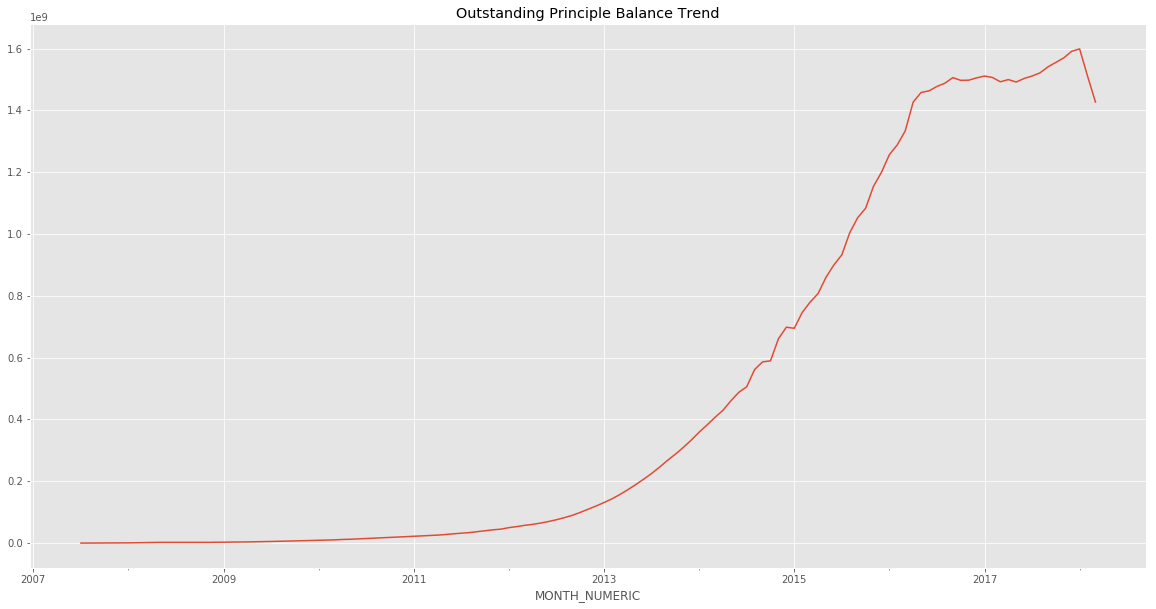

In [22]:
import datetime as dt
payment['MONTH_NUMERIC'] = pd.to_datetime(payment.MONTH).dt.to_period('M')
payment.groupby('MONTH_NUMERIC')['PBAL_END_PERIOD'].sum().plot(kind='line', figsize=(20,10),title='Outstanding Principle Balance Trend')
# lending club outstanding loan amount keeps growing as the company business grows - makes sense.

5. When was the first loan in the file issued? (`IssuedDate` represents the issue date of a loan)

In [23]:
payment['IssuedDate'].min()

'APR2008'

6. How many loans have payment walk issues? To calculate this, find records where the `PBAL_BEG_PERIOD` -  `PRNCP_PAID` is not equal to the `PBAL_END_PERIOD` field. Use a point .01 tolerance (in other words, if the actual ansd expected values vary by < .01, assume they are equal). Provide an example of 5 loan id/month combinations (ex: Loan ID 123, March 2016)

In [24]:
payment[['PBAL_BEG_PERIOD','PRNCP_PAID','PBAL_END_PERIOD']].head()

,PBAL_BEG_PERIOD,PRNCP_PAID,PBAL_END_PERIOD
0,10800.000000,244.742600,10555.257400
1,10555.257400,247.509945,10307.747455
2,10307.747455,250.308582,10057.438873
3,10057.438873,253.138862,9804.300011
4,9804.300011,256.001146,9548.298865


In [40]:
payment_walk_loans = payment.loc[(payment['PBAL_BEG_PERIOD']- payment['PRNCP_PAID']<payment['PBAL_END_PERIOD']*0.99) |\
            (payment['PBAL_BEG_PERIOD']- payment['PRNCP_PAID']>payment['PBAL_END_PERIOD']*1.01), 
           ['LOAN_ID','MONTH','PBAL_BEG_PERIOD','PRNCP_PAID','PBAL_END_PERIOD']]

In [41]:
payment_walk_loans.head()

,LOAN_ID,MONTH,PBAL_BEG_PERIOD,PRNCP_PAID,PBAL_END_PERIOD
35,57416,NOV2012,362.738735,393.075428,0.0
273,69550,JUL2014,2737.404466,2781.747419,0.0
389,81085,JAN2008,8724.130448,8724.612481,0.0
432,91023,JAN2008,1620.111551,1620.681552,0.0
463,91126,JAN2010,1043.266234,1045.272264,0.0


In [42]:
print('There are %d payment walk loans' % (payment_walk_loans.shape[0]))

There are 17558 payment walk loans


### Loan Tape Questions

1. Which Grade has the most loans (`grade` column)?

In [45]:
loan_data.shape

(301057, 151)

In [46]:
loan_data.id.nunique() # id in loan_data is unique

301057

In [47]:
loan_data.groupby('grade').id.count() #grade A has the most loans

grade
A    50494
B    89021
C    89704
D    43632
E    19716
F     6530
G     1960
Name: id, dtype: int64

2. During which month were the most loans issued (`issue_d`)? 

In [50]:
loan_data.groupby('issue_d').id.count().sort_values(ascending=False)[:20]
# Mar-2016  issued the most  10537 loans

issue_d
Mar-2016    10537
Oct-2015     8212
Jul-2015     7840
Dec-2015     7621
Aug-2017     7386
Nov-2017     7236
Jul-2017     6810
Feb-2016     6795
Sep-2017     6788
Oct-2014     6785
Oct-2017     6571
May-2017     6513
Jun-2017     6454
Nov-2015     6441
Dec-2017     6410
Mar-2017     6357
Apr-2016     6347
Dec-2016     6249
Aug-2015     6167
Aug-2016     6161
Name: id, dtype: int64

3. What percentage of the loans are joint by original balance (`dti_joint` is populated for joint loans, `funded_amnt` is original balance)? By number of loans?

In [51]:
loan_data[['dti_joint','funded_amnt']].head()

,dti_joint,funded_amnt
0,NaN,15000.0
1,NaN,5000.0
2,NaN,7000.0
3,NaN,3000.0
4,NaN,6000.0


In [58]:
loan_data.isnull().sum()['dti_joint'] #292106 loans are not joint loans = 8951 jointed loans = 2.97% of total # loans

292106

In [61]:
number_joint_loans=loan_data.loc[loan_data['dti_joint'].notnull(), 'id']
print('%f of the loans are joint loans' %(len(number_joint_loans)/loan_data.shape[0]))

0.029732 of the loans are joint loans


In [63]:
balance_joint_loans = loan_data.loc[loan_data['dti_joint'].notnull(), 'funded_amnt']
print('%f of the loans orginal balances are joint loans' %(balance_joint_loans.sum()/loan_data.funded_amnt.sum()))

0.039623 of the loans orginal balances are joint loans


4. How many loans have a different `loan_amnt` than `funded_amnt`? Which loan has the largest difference and how much is it?

In [64]:
loan_fund_diff=loan_data.loc[loan_data['loan_amnt'] != loan_data['funded_amnt'], ['id','loan_amnt','funded_amnt']]

In [66]:
loan_fund_diff['diff']=loan_fund_diff['loan_amnt'] - loan_fund_diff['funded_amnt']
loan_fund_diff.sort_values(by='diff', ascending=False).head(20)
#Loan id “1031765” has the largest difference between loan amount and funded amount; diff =$20600.0

,id,loan_amnt,funded_amnt,diff
39302,1031765,25000.0,4400.0,20600.0
4047,613950,20000.0,2650.0,17350.0
4034,615373,20000.0,3050.0,16950.0
6837,141774,20000.0,4800.0,15200.0
6546,366887,20000.0,6100.0,13900.0
2659,752865,35000.0,21275.0,13725.0
143,1053763,35000.0,21350.0,13650.0
2537,762019,33950.0,20650.0,13300.0
1961,773677,35000.0,21825.0,13175.0
2268,788396,35000.0,22025.0,12975.0


5. What is the average recovery fee percentage? (`collection_recovery_fee` divided by `recoveries`, where `recoveries` is not null)

In [68]:
rec_fee = loan_data.loc[loan_data['recoveries'].notnull(),['collection_recovery_fee','recoveries']]

In [69]:
rec_fee['collection_recovery_fee'].sum() / rec_fee['recoveries'].sum()
## average recovery fee percentage = 16.14% 

0.16142373594795933

### joint questions

1. How many loans are only on the payment file?

In [97]:
unique_payment_id = payment['LOAN_ID'].unique()

In [98]:
unique_payment_id.shape

(303170,)

In [99]:
unique_payment_id = pd.DataFrame(unique_payment_id, columns = ['loan_id'])

In [100]:
unique_payment_id.head()

,loan_id
0,57416
1,64949
2,65104
3,65426
4,67025


In [102]:
unique_loan_id = pd.DataFrame(loan_data.id , columns = ['id'])
payment_only = pd.merge(unique_payment_id, unique_loan_id, left_on='loan_id', right_on='id', how='left')

In [106]:
payment_only[payment_only.id.isnull()].head()

,loan_id,id
56,136226,NaN
152,216029,NaN
260,283480,NaN
300,311430,NaN
492,364557,NaN


In [107]:
print('there are %d payment only loans' % len(payment_only[payment_only.id.isnull()]))

there are 3169 payment only loans


2. How many loans are only on the loan tape file?

In [109]:
loan_only = pd.merge(unique_payment_id, unique_loan_id, left_on='loan_id', right_on='id', how='right')
print('there are %d loan tape only loans' % len(loan_only[loan_only.loan_id.isnull()]) )

there are 1056 loan tape only loans


3. What is the weighted average bankcard utilization at month end December 2017? To calculate this, multiply the `bc_util` field from the loan tape by the `PBAL_END_PERIOD` field in the payment file (as of 2017-12-31), and divide this by the sum of the `PBAL_END_PERIOD` in the payment file as of 2017-12-31

In [116]:
loan_data.loc[loan_data['bc_util'].notnull(),['id','bc_util']].head()

,id,bc_util
7319,10129477,87.7
7320,10159498,25.0
7321,10159548,79.1
7322,10078061,91.3
7323,10119540,66.4


In [141]:
#cutoff= pd.to_datetime(payment.loc[payment.MONTH=='DEC2017','MONTH']).dt.to_period("M").unique()
selected_payment = payment.loc[pd.to_datetime(payment['MONTH'])<=pd.to_datetime('DEC2017'),['LOAN_ID','PBAL_END_PERIOD','MONTH']]

In [142]:
selected_payment.head()

,LOAN_ID,PBAL_END_PERIOD,MONTH
0,57416,10555.257400,DEC2009
1,57416,10307.747455,JAN2010
2,57416,10057.438873,FEB2010
3,57416,9804.300011,MAR2010
4,57416,9548.298865,APR2010


In [146]:
selected_loan = loan_data[['id','bc_util']]
joint = pd.merge(selected_payment, selected_loan, left_on='LOAN_ID', right_on='id', how='left')

In [152]:
joint.head()

,LOAN_ID,PBAL_END_PERIOD,MONTH,id,bc_util
0,57416,10555.257400,DEC2009,57416.0,NaN
1,57416,10307.747455,JAN2010,57416.0,NaN
2,57416,10057.438873,FEB2010,57416.0,NaN
3,57416,9804.300011,MAR2010,57416.0,NaN
4,57416,9548.298865,APR2010,57416.0,NaN


In [149]:
joint.PBAL_END_PERIOD.sum()

57081426405.39101

In [151]:
weighted_bankcard_utilization = (joint.bc_util * joint.PBAL_END_PERIOD).sum() / joint.PBAL_END_PERIOD.sum()
print('weighted bankcard utilization as of Dec 2017 is %f' % weighted_bankcard_utilization )

weighted bankcard utilization as of Dec 2017 is 60.890067


## Part 2. Exploratory Data Analysis

#### 1. What type of  `purpose`  have more likelihood of being "bad loans" ?

In [3]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
       'Default', 'Issued'], dtype=object)

In [4]:
paidoff_loans= ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
bad_loans = ['Charged Off','Default' ,'Does not meet the credit policy. Status:Charged Off' ]
late_loans= ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']
loan_data['loan_status_clean'] = loan_data['loan_status'].apply(lambda x: 'Fully Paid' if x in paidoff_loans \
                                                                else 'Default' if x in bad_loans \
                                                                else 'Late' if x in late_loans else 'Current')

In [5]:
import seaborn as sns
purp_loan= ['purpose', 'loan_status_clean']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_data[purp_loan[0]], loan_data[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status_clean,Current,Default,Fully Paid,Late
purpose,,,,
car,1464,258,1465,47
credit_card,30601,6014,28395,1082
debt_consolidation,76175,20278,73799,3608
educational,0,14,65,0
home_improvement,9820,1804,8201,363
house,611,178,621,39
major_purchase,3099,646,2860,129
medical,1753,360,1358,94
moving,871,288,819,59


In [6]:
purp_crosstab = pd.crosstab(loan_data[purp_loan[0]], loan_data[purp_loan[1]])

In [7]:
purp_crosstab_2 = purp_crosstab[purp_crosstab['Fully Paid']+purp_crosstab['Default']+purp_crosstab['Late']+purp_crosstab['Current']>400].copy()

In [8]:
loan_data['int_rate'] = loan_data['int_rate'].astype('str').apply(lambda x: float(x.strip('%'))).astype('float')

In [9]:
#purp_crosstab_2=purp_crosstab.copy()
purp_crosstab_2['Default Rate']= round(purp_crosstab_2['Default'] /(purp_crosstab_2['Fully Paid']+purp_crosstab_2['Default']+purp_crosstab_2['Late']+purp_crosstab_2['Current']),2)
purp_crosstab_2['Default Balance']= loan_data.loc[loan_data['loan_status_clean']=='Default', ['purpose','loan_amnt']].groupby('purpose').loan_amnt.sum()
purp_crosstab_2['Fully Paid Balance']= loan_data.loc[loan_data['loan_status_clean']=='Fully Paid', ['purpose','loan_amnt']].groupby('purpose').loan_amnt.sum()
purp_crosstab_2['Default/Fully Paid Balance Ratio']= round(purp_crosstab_2['Default Balance'] / purp_crosstab_2['Fully Paid Balance'],2)
purp_crosstab_2['Median Interest Rate'] = loan_data.groupby('purpose').int_rate.median()
purp_crosstab_2.sort_values(by=['Default Rate','Default/Fully Paid Balance Ratio'],ascending=False)

loan_status_clean,Current,Default,Fully Paid,Late,Default Rate,Default Balance,Fully Paid Balance,Default/Fully Paid Balance Ratio,Median Interest Rate
purpose,,,,,,,,,
small_business,1387,579,1364,100,0.17,9673925.0,2.041218e+07,0.47,15.05
moving,871,288,819,59,0.14,2481300.0,6.228825e+06,0.40,14.65
debt_consolidation,76175,20278,73799,3608,0.12,326176600.0,1.092196e+09,0.30,13.11
house,611,178,621,39,0.12,2783425.0,9.355225e+06,0.30,14.48
other,8641,1899,6781,396,0.11,20858575.0,6.423928e+07,0.32,13.67
vacation,1043,201,805,38,0.10,1550875.0,4.620300e+06,0.34,12.99
major_purchase,3099,646,2860,129,0.10,9190250.0,3.006635e+07,0.31,12.29
medical,1753,360,1358,94,0.10,3449800.0,1.182310e+07,0.29,13.35
home_improvement,9820,1804,8201,363,0.09,28809325.0,1.138817e+08,0.25,12.29


Text(0,0.5,'Number of Loans')

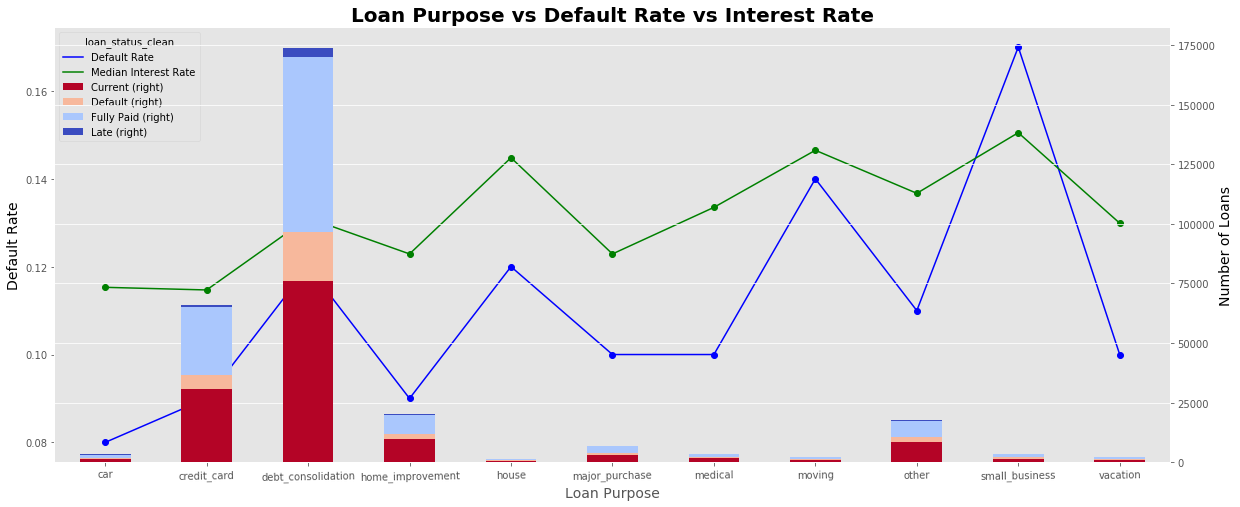

In [22]:
linePlot = purp_crosstab_2[['Default Rate']]   
linePlot2 = purp_crosstab_2[['Median Interest Rate']]/100 
barPlot =  purp_crosstab_2.iloc[:,0:4]
cmap = plt.cm.coolwarm_r
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
ax1 = linePlot2.plot(figsize=(20,8),ax=ax, marker='o',color = 'g')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True, colormap=cmap)
ax.set_title('Loan Purpose vs Default Rate vs Interest Rate',fontsize=20,weight="bold")
ax.set_xlabel('Loan Purpose',fontsize=14)
ax.set_ylabel('Default Rate',color = 'k',fontsize=14)
ax2.set_ylabel('Number of Loans',color = 'k',fontsize=14)

* Debt consolidation is the No.1 purpose for loan at LC, however, small business seems to be the most risky category for loan default - 17% of the borrowers cannot pay back and go default, and the default/full paid ratio is also the highest among all purpose categories.

#### 2. What range of `dti` are more likely to have difficulty to pay back the loan and go default?

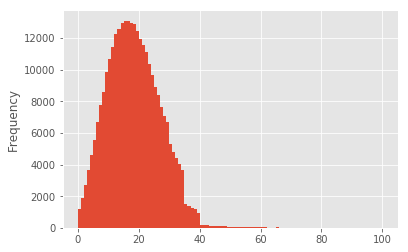

In [23]:
loan_data['dti'].plot.hist(bins=100, range=[0.0, 100.0])
## most of the borrowers have dti in (0,40) range

In [24]:
loan_data['dti_range'] = loan_data['dti'].apply(lambda x:'A <=8' if x<=8 else 'B 9-16' if x>=9 and x<=16 else 'C 17-24' if x>=17 and x<=24\
                                               else 'D 25-32' if x>=25 and x<=32 else 'E 33-40' if x>32 and x<=40 else 'F >40')

In [25]:
dti_crosstab = pd.crosstab(loan_data['dti_range'], loan_data['loan_status_clean'])
dti_crosstab['Default Rate']= round(dti_crosstab['Default'] /(dti_crosstab['Fully Paid']+dti_crosstab['Default']+dti_crosstab['Late']+dti_crosstab['Current']),2)
dti_crosstab['Fully Paid Rate']= round(dti_crosstab['Fully Paid'] /(dti_crosstab['Fully Paid']+dti_crosstab['Default']+dti_crosstab['Late']+dti_crosstab['Current']),2)
dti_crosstab['Avg Interest Rate'] = loan_data.groupby('dti_range').int_rate.mean()
dti_crosstab

loan_status_clean,Current,Default,Fully Paid,Late,Default Rate,Fully Paid Rate,Avg Interest Rate
dti_range,,,,,,,
A <=8,14283,2826,16471,563,0.08,0.48,12.190011
B 9-16,36301,7569,37774,1377,0.09,0.45,12.506764
C 17-24,37234,9307,35182,1709,0.11,0.42,13.276165
D 25-32,23132,6598,18018,1161,0.13,0.37,14.176642
E 33-40,9084,2896,5741,512,0.16,0.31,15.407358
F >40,15516,3395,13770,638,0.10,0.41,13.121888


Text(0,0.5,'Number of Loans')

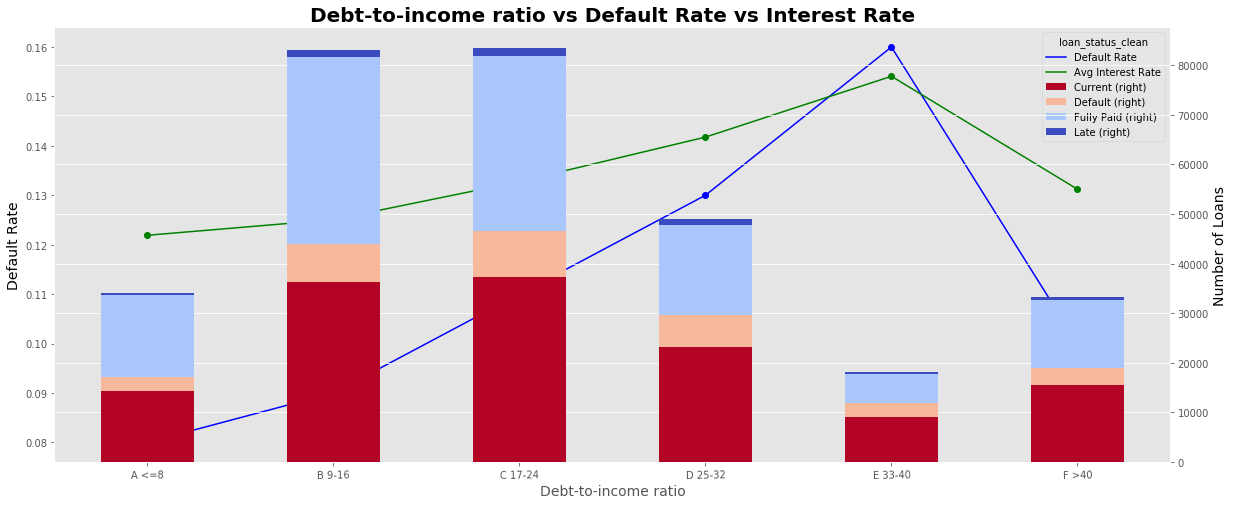

In [26]:
linePlot = dti_crosstab[['Default Rate']]
linePlot2 = dti_crosstab[['Avg Interest Rate']]/100
barPlot =  dti_crosstab.iloc[:,0:4]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
ax2 = linePlot2.plot(figsize=(20,8),ax=ax, marker='o',color = 'g')
ax3 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True,colormap=cmap)
ax.set_title('Debt-to-income ratio vs Default Rate vs Interest Rate',fontsize=20,weight="bold")
ax.set_xlabel('Debt-to-income ratio',fontsize=14)
ax.set_ylabel('Default Rate',color = 'k',fontsize=14)
#ax2.set_ylabel('Median Interest Rate',color = 'b',fontsize=14)
ax3.set_ylabel('Number of Loans',color = 'k',fontsize=14)

** The higher the dti, the higher chance that the person cannot pay back the loan. The most risky group is where dti is in range of 33-40. Surprisingly, the default rate goes down in the highest dti group >40. The reason might be that the underwriting is more selective and more strict for LC to issue loans to very high dti group. So if they do, chance of them paying back the loan is higher. just a guess.

#### How much the borrowers' bankcard utilization and revolving utilization rate can tell about the probability of default?

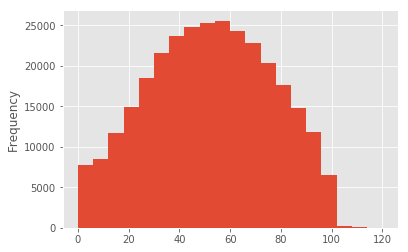

In [27]:
loan_data['revol_util'] = loan_data['revol_util'].astype('str').apply(lambda x: float(x.strip('%'))).astype('float')
loan_data['revol_util'].plot.hist(bins=20, range=[0.0, 120.0]) ## normally distributed

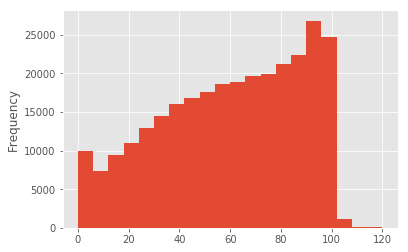

In [28]:
loan_data['bc_util'].plot.hist(bins=20, range=(0, 120))

In [29]:
loan_data['revol_util_quantile'] = loan_data['revol_util'].apply(lambda x: 'A <= 0.2' if x<=20 \
                                                                 else 'B 0.2-0.4' if x>20 and x<=40\
                                                                 else 'C 0.4-0.6' if x>40 and x<=60\
                                                                 else 'D 0.6-0.8' if x>60 and x<=80\
                                                                 else 'E >0.8' )

In [10]:
def crosstab (df, col, crosstabname):
    crosstabname = pd.crosstab(df[col], df['loan_status_clean'])
    crosstabname['Default Rate']= round(crosstabname['Default'] /(crosstabname['Fully Paid']+crosstabname['Default']+crosstabname['Late']+crosstabname['Current']),2)
    crosstabname['Fully Paid Rate']= round(crosstabname['Fully Paid'] /(crosstabname['Fully Paid']+crosstabname['Default']+crosstabname['Late']+crosstabname['Current']),2)
    crosstabname['Median Interest Rate'] = df.groupby(col).int_rate.median()
    return crosstabname

In [31]:
revol_util_crosstab = crosstab(loan_data, 'revol_util_quantile', 'revol_util_crosstab')
revol_util_crosstab

loan_status_clean,Current,Default,Fully Paid,Late,Default Rate,Fully Paid Rate,Median Interest Rate
revol_util_quantile,,,,,,,
A <= 0.2,15616,2435,14248,528,0.07,0.43,10.42
B 0.2-0.4,31401,6163,27547,1190,0.09,0.42,11.49
C 0.4-0.6,37497,9325,35260,1660,0.11,0.42,12.74
D 0.6-0.8,31884,8822,31224,1593,0.12,0.42,13.59
E >0.8,19152,5846,18677,989,0.13,0.42,14.09


In [11]:
def bar_line_plot (crosstabname, col):
    linePlot = crosstabname[['Default Rate']]
    linePlot2 = crosstabname[['Median Interest Rate']]/100
    barPlot =  crosstabname.iloc[:,0:4]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = linePlot2.plot(figsize=(20,8),ax=ax, marker='o',color = 'g')
    ax3 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True, stacked=True,colormap=cmap)
    ax.set_title(col +' vs Default Rate vs Interest Rate',fontsize=20,weight="bold")
    ax.set_xlabel(col ,fontsize=14)
    ax.set_ylabel('Default Rate',color = 'k',fontsize=14)
    #ax2.set_ylabel('Fully Paid Rate',color = 'b',fontsize=14)
    ax3.set_ylabel('Number of Loans',color = 'k',fontsize=14)
    rects = ax3.patches
    labels = np.round(crosstabname['Default Rate'].values*100,2)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax3.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom',fontsize=12)
    plt.tight_layout() 

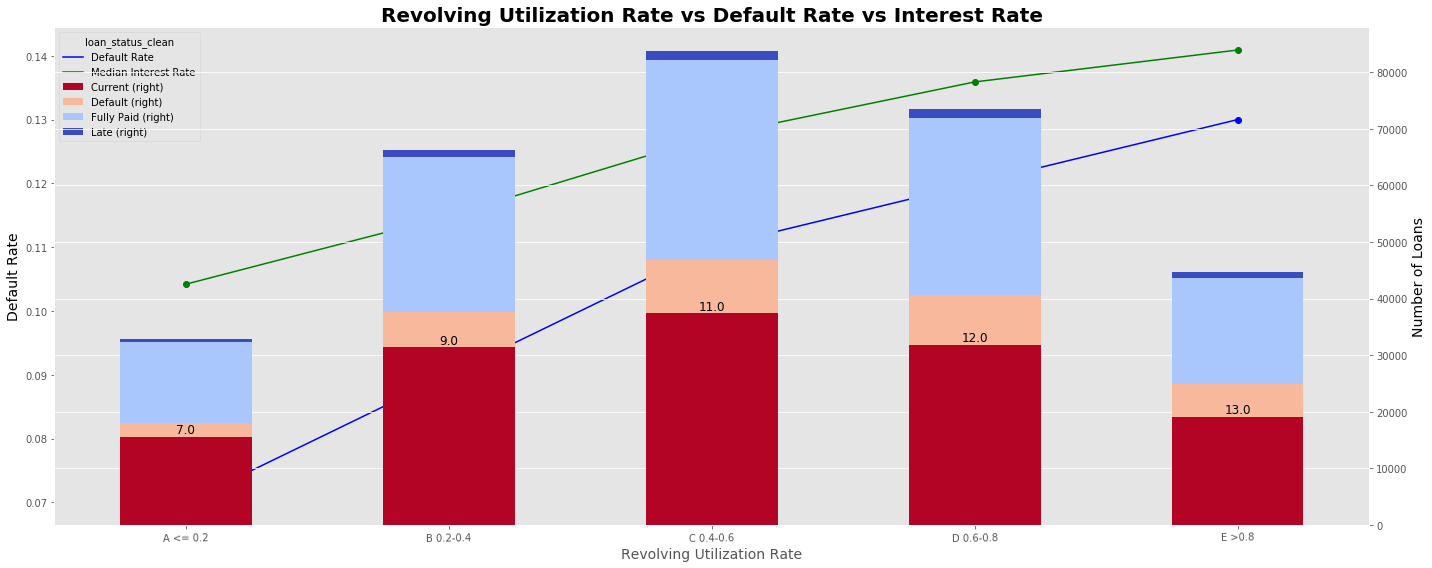

In [33]:
bar_line_plot(revol_util_crosstab , 'Revolving Utilization Rate')

In [34]:
loan_data['bc_util_quantile'] = loan_data['bc_util'].apply(lambda x: 'A <= 0.2' if x<=20 \
                                                                 else 'B 0.2-0.4' if x>20 and x<=40\
                                                                 else 'C 0.4-0.6' if x>40 and x<=60\
                                                                 else 'D 0.6-0.8' if x>60 and x<=80\
                                                                 else 'E >0.8' )

In [35]:
bc_util_crosstab = crosstab(loan_data, 'bc_util_quantile', 'bc_util_crosstab')
bc_util_crosstab

loan_status_clean,Current,Default,Fully Paid,Late,Default Rate,Fully Paid Rate,Median Interest Rate
bc_util_quantile,,,,,,,
A <= 0.2,14925,2340,12456,528,0.08,0.41,10.49
B 0.2-0.4,22783,3747,18342,814,0.08,0.40,10.99
C 0.4-0.6,27490,5900,23997,1165,0.10,0.41,12.12
D 0.6-0.8,29614,7373,27127,1294,0.11,0.41,12.99
E >0.8,40738,13231,45034,2159,0.13,0.45,13.99


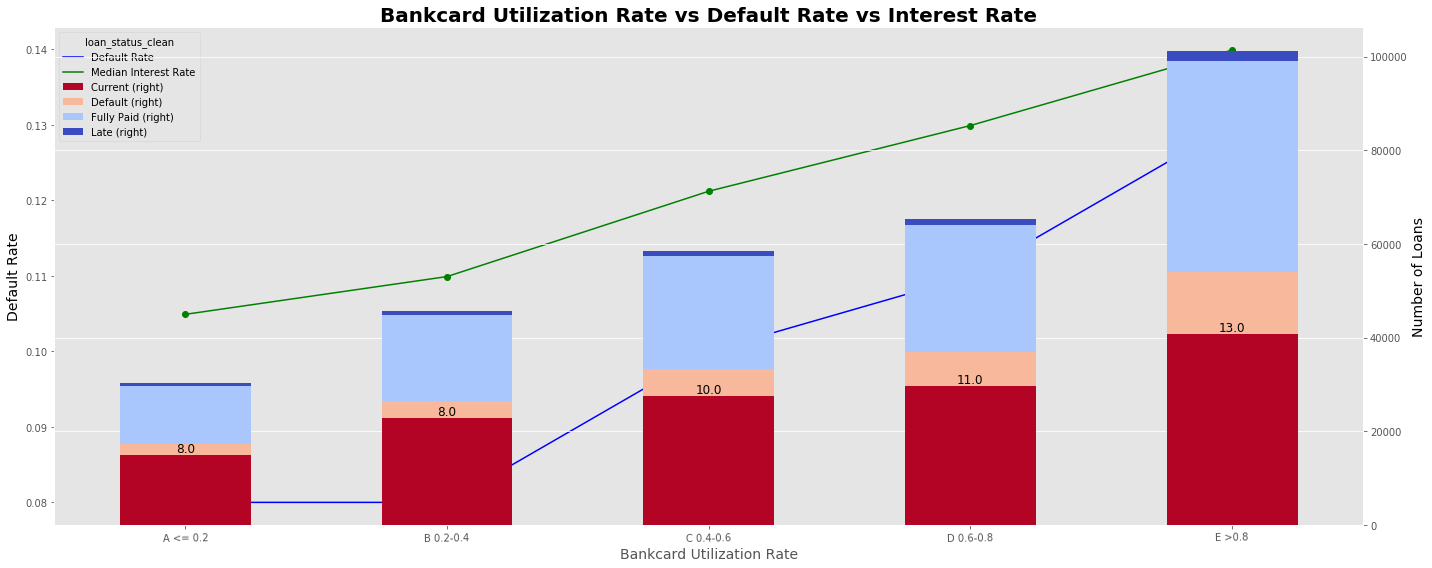

In [36]:
bar_line_plot(bc_util_crosstab , 'Bankcard Utilization Rate')

** bankcard and revolving balance utilization tells a lot about the borrowers' credibility. The higher the credit line utiliation, the higher the risk of default

#### Grade vs Loan default

In [12]:
grade_crosstab = crosstab(loan_data, 'grade', 'grade_crosstab')
grade_crosstab

loan_status_clean,Current,Default,Fully Paid,Late,Default Rate,Fully Paid Rate,Median Interest Rate
grade,,,,,,,
A,23783,1667,24731,313,0.03,0.49,7.26
B,41944,6090,39784,1203,0.07,0.45,10.75
C,42641,10049,34963,2051,0.11,0.39,13.99
D,17673,7570,17063,1326,0.17,0.39,17.57
E,6930,4656,7446,684,0.24,0.38,20.99
F,1945,1966,2342,277,0.30,0.36,24.50
G,634,593,627,106,0.30,0.32,27.88


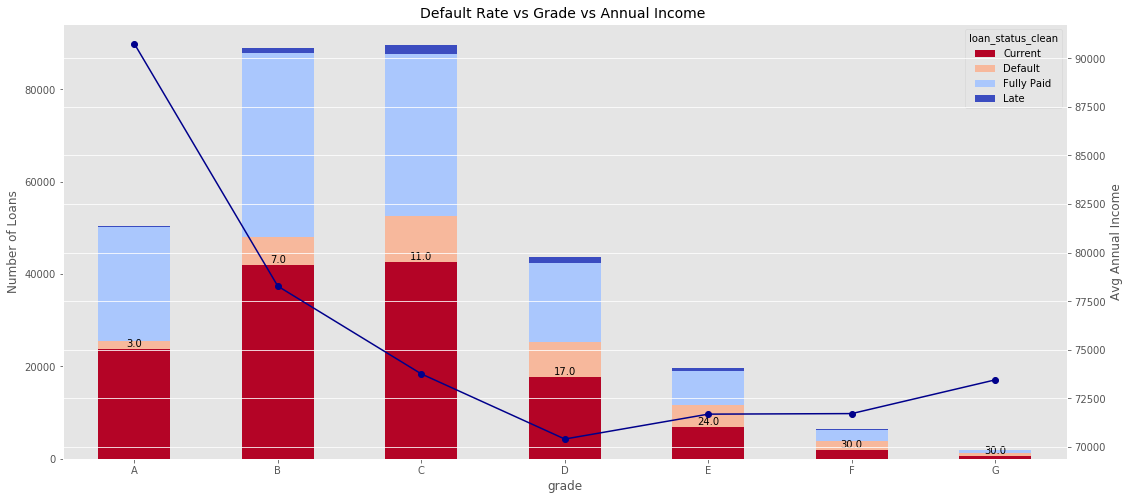

In [17]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
cmap = plt.cm.coolwarm_r
loans_by_grade = loan_data.groupby(['grade', 'loan_status_clean']).size()
ax2 = loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax3 = loan_data.groupby('grade').annual_inc.mean().plot(marker='o',ax=ax1,color = 'darkblue',secondary_y=True)
#ax4 = loan_data.groupby('grade').int_rate.median().plot(marker='o',ax=ax1,color = 'green',secondary_y=True)
ax1.set_title('Default Rate vs Grade vs Annual Income ', fontsize=14)
ax3.set_ylabel('Avg Annual Income')
ax2.set_ylabel('Number of Loans')
#adding the text labels
rects = ax1.patches
labels = np.round(grade_crosstab['Default Rate'].values*100,2)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [14]:
loan_data.groupby('grade').annual_inc.apply(lambda x: x.isnull().sum()) 
## the upward trend of income in grade E-G is not because of missing values in annual_inc

grade
A    0
B    0
C    0
D    0
E    0
F    0
G    0
Name: annual_inc, dtype: int64

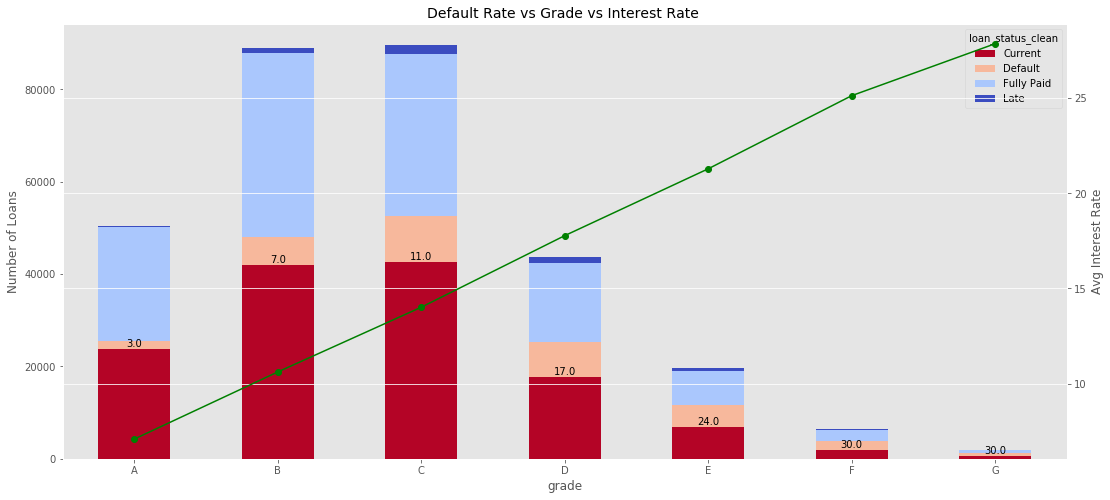

In [16]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
cmap = plt.cm.coolwarm_r
loans_by_grade = loan_data.groupby(['grade', 'loan_status_clean']).size()
ax2 = loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
#ax3 = loan_data.groupby('grade').annual_inc.median().plot(marker='o',ax=ax1,color = 'darkblue',secondary_y=True)
ax4 = loan_data.groupby('grade').int_rate.mean().plot(marker='o',ax=ax1,color = 'green',secondary_y=True)
ax1.set_title('Default Rate vs Grade vs Interest Rate ', fontsize=14)
ax4.set_ylabel('Avg Interest Rate')
ax2.set_ylabel('Number of Loans')
#adding the text labels
rects = ax1.patches
labels = np.round(grade_crosstab['Default Rate'].values*100,2)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

** Most of the loans concentrate on grade B and C. High income people generally have better grade and have less chance of default, but also lowest interest rate. If they want a little higher ROI but not too risky, grade B/C loans can be viable choices. Grade D,E,F,G have increasingly higher default rate, together with significantly higher interest rate.

#### Explore the relations among `grade`, `purpose`, `annual_inc` and `int_rate`

Text(0.5,1,'Avg Interest Rate by Purpose and Loan Grade')

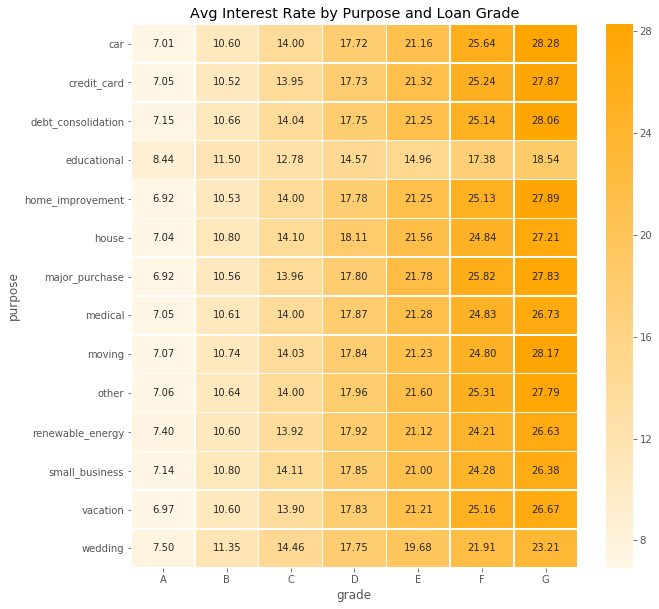

In [81]:
plt.figure(figsize=(10,10))
cm = sns.light_palette("orange", as_cmap=True)
purpose_grade = round(loan_data.groupby(['purpose','grade']).int_rate.mean(),2)
#annual_inc_grade.unstack().style.background_gradient(cmap = cm)
sns.heatmap(purpose_grade.unstack(), fmt='.2f', linewidths=0.5, annot= True, cmap = cm)
plt.title('Avg Interest Rate by Purpose and Loan Grade')

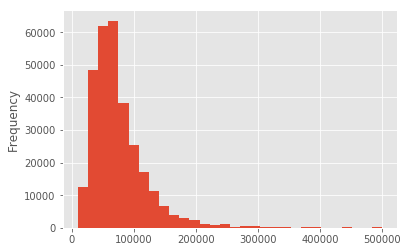

In [43]:
loan_data.annual_inc.plot.hist(bins=30, range= (10000, 500000))

In [44]:
q = loan_data.annual_inc.quantile([0.45, 0.75])
q

0.45    60000.0
0.75    92000.0
Name: annual_inc, dtype: float64

In [77]:
loan_data['income_bucket'] = loan_data.annual_inc.apply(lambda x: 'Low Income <=60k' if x<=q.iloc[0] \
                                                        else 'Medium Income 60k-92k' if x>q.iloc[0] and x<=q.iloc[1]\
                                                        else 'High Income >92k')

Text(0.5,1,'Avg Interest Rate by Purpose and Income Level')

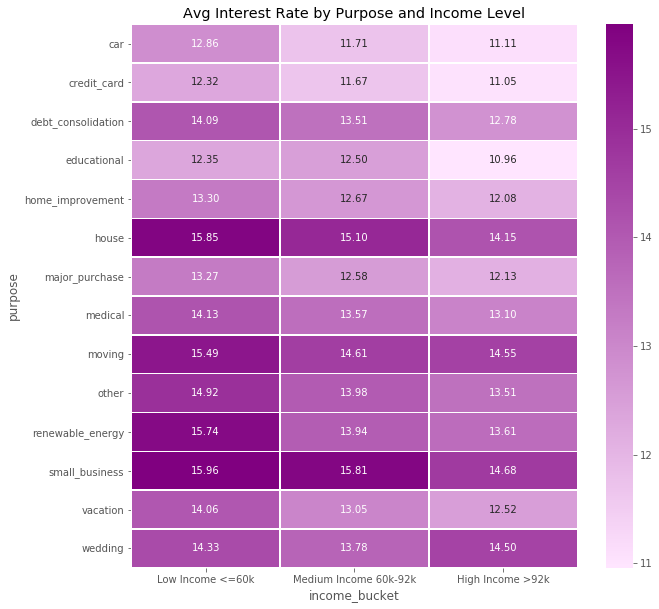

In [80]:
plt.figure(figsize=(10,10))
cm = sns.light_palette("purple", as_cmap=True)
annual_inc_grade = round(loan_data.groupby(['purpose','income_bucket']).int_rate.mean(),2)
column_order = ['Low Income <=60k','Medium Income 60k-92k','High Income >92k']
annual_inc_grade = annual_inc_grade.unstack().reindex_axis(column_order, axis=1)
sns.heatmap(annual_inc_grade, fmt='.2f', linewidths=0.5, annot= True, cmap = cm)
plt.title('Avg Interest Rate by Purpose and Income Level')

In [91]:
key_purpose = ['car', 'credit_card', 'debt_consolidation', 'educational',
        'house', 'medical', 'moving', 'small_business', 'vacation', 'wedding']
annual_inc_grade_2 = annual_inc_grade.loc[key_purpose,:]

Text(0.5,1,'Avg Interest Rate by Purpose and Income Level')

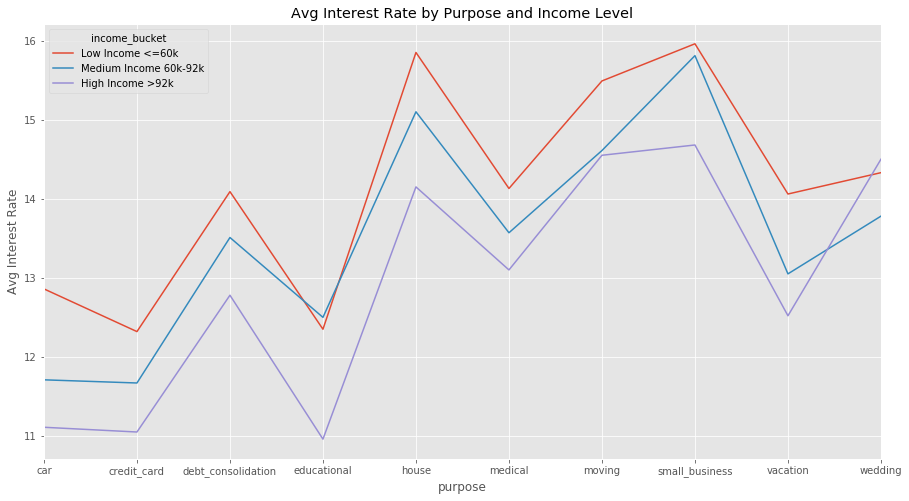

In [97]:
fig=plt.figure(figsize=(15,8))
ax1= fig.add_subplot(111)
ax2 = annual_inc_grade_2.plot(ax=ax1)
plt.ylabel('Avg Interest Rate')
plt.title('Avg Interest Rate by Purpose and Income Level')

** Not all the loans give lower interest rate to high income people. Wedding, for example, charges higher interest rate for higher income people. Medium income people pay slightly higher interest in education than high and low income.

Text(0.5,1,'Avg Interest Rate by Purpose and Grade')

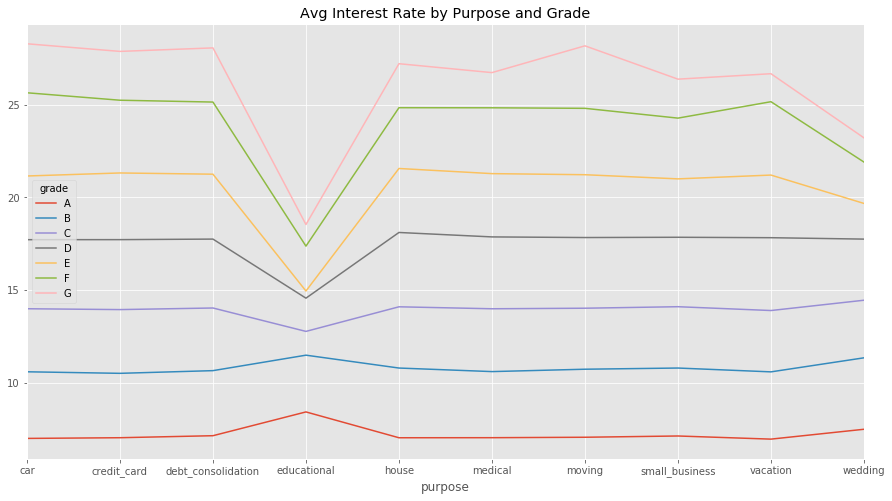

In [120]:
fig=plt.figure(figsize=(15,8))
ax1= fig.add_subplot(111)
purpose_grade = loan_data.groupby(['purpose','grade']).int_rate.mean()
ax2 = purpose_grade.unstack().loc[key_purpose,:].plot(ax=ax1)
plt.title('Avg Interest Rate by Purpose and Grade')

In [121]:
purpose_grade.unstack().loc[key_purpose,:]

grade,A,B,C,D,E,F,G
purpose,,,,,,,
car,7.008217,10.600353,13.999444,17.722589,21.156621,25.643654,28.285000
credit_card,7.045451,10.516989,13.953402,17.725308,21.320064,25.241990,27.874069
debt_consolidation,7.153998,10.662002,14.039571,17.754753,21.253637,25.142906,28.062841
educational,8.436471,11.496000,12.777857,14.570000,14.956250,17.375000,18.540000
house,7.043575,10.802359,14.104146,18.111463,21.561517,24.838354,27.210667
medical,7.047076,10.610714,13.997955,17.872262,21.284429,24.833721,26.730455
moving,7.070719,10.738797,14.028136,17.838323,21.225570,24.804805,28.174706
small_business,7.138925,10.802574,14.109046,17.852853,21.001225,24.276727,26.377895
vacation,6.969628,10.596101,13.903041,17.829640,21.206593,25.162000,26.671250


In [105]:
key_purpose2 = ['car', 'credit_card', 'debt_consolidation', 'major purchase',
        'house', 'medical', 'moving', 'small_business', 'vacation', 'wedding']

purpose_grade_crosstab = loan_data.groupby(['purpose','grade']).loan_status_clean.value_counts()
purpose_grade_crosstab_2 = purpose_grade_crosstab.unstack().loc[key_purpose2,:]
purpose_grade_crosstab_2 = purpose_grade_crosstab_2.fillna(0)
purpose_grade_crosstab_2['Default Rate'] = purpose_grade_crosstab_2['Default']/(purpose_grade_crosstab_2['Current']+purpose_grade_crosstab_2['Default']+purpose_grade_crosstab_2['Fully Paid']+purpose_grade_crosstab_2['Late'])

In [122]:
purpose_grade_crosstab_2.loc[:,['Default Rate']].unstack()

loan_status_clean  Default Rate                                          \
grade                         A         B         C         D         E   
purpose                                                                   
car                    0.035398  0.062807  0.092199  0.136240  0.172414   
credit_card            0.035240  0.068540  0.113166  0.179504  0.242452   
debt_consolidation     0.032927  0.070292  0.115893  0.178343  0.242403   
house                  0.048309  0.056338  0.102981  0.149826  0.196629   
medical                0.025424  0.071356  0.100452  0.140549  0.160714   
moving                 0.041916  0.085213  0.110606  0.186094  0.236842   
small_business         0.059140  0.093023  0.132435  0.189333  0.271335   
vacation               0.033457  0.052448  0.093352  0.149584  0.237037   
wedding                0.027778  0.166667  0.095238  0.151899  0.205128   

loan_status_clean                       
grade                      F         G  
purpose                                 
car                 0.230769  0.071429  
credit_card         0.281847  0.248276  
debt_consolidation  0.312203  0.305195  
house               0.316456  0.244444  
medical             0.279070  0.500000  
moving              0.350649  0.117647  
small_business      0.322727  0.442105  
vacation            0.200000  0.375000  
wedding             0.166667  0.333333

Text(0.5,1,'Default Rate by Purpose and Grade')

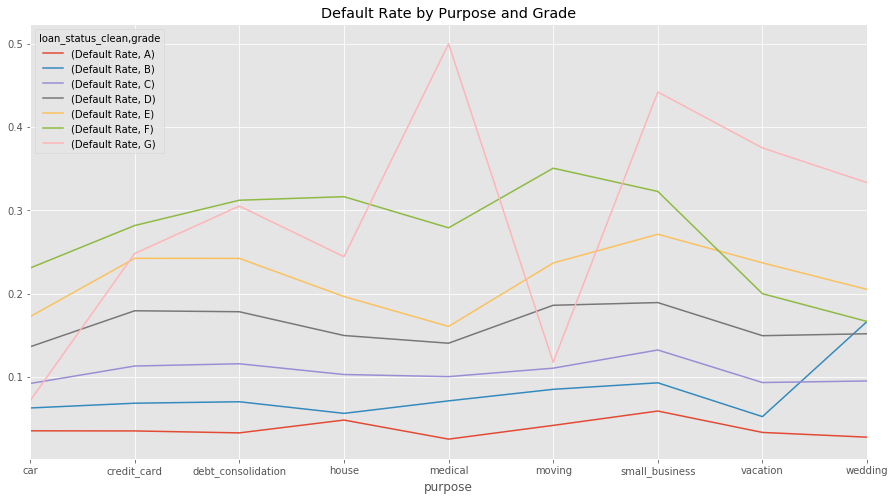

In [123]:
fig=plt.figure(figsize=(15,8))
ax1= fig.add_subplot(111)
#purpose_grade_crosstab = loan_data.groupby(['purpose','grade']).loan_status_clean.value_counts()
ax2 = purpose_grade_crosstab_2.loc[:,['Default Rate']].unstack().plot(ax=ax1)
plt.title('Default Rate by Purpose and Grade')

** there's something interesting with grade G- it's expected to have the highest default rate as I understand it's the lowest grade, but in fact, grade G has a lot lower default rate than grade F in lots of loan purpose. G shows a particularly low default rate in the Moving category, and a starkingly high default rate in medical category. Grade B borrowers have a surprisingly high default rate in wedding. 

## END